In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [2]:
# directory = './results/mdi_local.real_data_regression/diabetes_regression_parallel/varying_sample_row_n/'
directory = './results/mdi_local.real_data_regression/ca_housing_new/varying_sample_row_n/'
# directory = './results/mdi_local.real_data_regression/diabetes_regression_new/varying_sample_row_n'
folder_names = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [3]:
# df = pd.read_csv("./results/mdi_local.real_data_regression/diabetes_regression/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/diabetes_classification/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_new_implementation/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_image/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/juvenile_new/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/ca_housing/varying_sample_row_n/seed331/results.csv")

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
combined_df

sample_row_n sample_row_n_name  rep  n_estimators  min_samples_leaf  \
0            NaN     keep_all_rows    0           100                 5   
1            NaN     keep_all_rows    0           100                 5   
2            NaN     keep_all_rows    0           100                 5   
3            NaN     keep_all_rows    0           100                 5   
4            NaN     keep_all_rows    0           100                 5   
5            NaN     keep_all_rows    0           100                 5   
6            NaN     keep_all_rows    0           100                 5   
7            NaN     keep_all_rows    0           100                 5   
8            NaN     keep_all_rows    0           100                 5   
9            NaN     keep_all_rows    0           100                 5   
10           NaN     keep_all_rows    0           100                 5   
11           NaN     keep_all_rows    0           100                 5   
12           NaN     keep_all_rows    0           100                 5   
13           NaN     keep_all_rows    0           100                 5   
14           NaN     keep_all_rows    0           100                 5   
15           NaN     keep_all_rows    0           100                 5   
16           NaN     keep_all_rows    0           100                 5   
17           NaN     keep_all_rows    0           100                 5   
18           NaN     keep_all_rows    0           100                 5   
19           NaN     keep_all_rows    0           100                 5   
20           NaN     keep_all_rows    0           100                 5   
21           NaN     keep_all_rows    0           100                 5   
22           NaN     keep_all_rows    0           100                 5   
23           NaN     keep_all_rows    0           100                 5   
24           NaN     keep_all_rows    0           100                 5   
25           NaN     keep_all_rows    0           100                 5   
26           NaN     keep_all_rows    0           100                 5   
27           NaN     keep_all_rows    0           100                 5   
28           NaN     keep_all_rows    0           100                 5   
29           NaN     keep_all_rows    0           100                 5   
30           NaN     keep_all_rows    0           100                 5   
31           NaN     keep_all_rows    0           100                 5   
32           NaN     keep_all_rows    0           100                 5   
33           NaN     keep_all_rows    0           100                 5   
34           NaN     keep_all_rows    0           100                 5   
35           NaN     keep_all_rows    0           100                 5   
36           NaN     keep_all_rows    0           100                 5   
37           NaN     keep_all_rows    0           100                 5   
38           NaN     keep_all_rows    0           100                 5   
39           NaN     keep_all_rows    0           100                 5   
40           NaN     keep_all_rows    0           100                 5   
41           NaN     keep_all_rows    0           100                 5   
42           NaN     keep_all_rows    0           100                 5   
43           NaN     keep_all_rows    0           100                 5   
44           NaN     keep_all_rows    0           100                 5   
45           NaN     keep_all_rows    0           100                 5   
46           NaN     keep_all_rows    0           100                 5   
47           NaN     keep_all_rows    0           100                 5   
48           NaN     keep_all_rows    0           100                 5   
49           NaN     keep_all_rows    0           100                 5   
50           NaN     keep_all_rows    0           100                 5   
51           NaN     keep_all_rows    0           100                 5   
52           NaN     keep_all

In [5]:
# Print the run-time of the feature importance algorithm
averages = combined_df.groupby('fi')['fi_time'].mean().reset_index()
print(averages)

                     fi       fi_time
0   Kernel_SHAP_RF_plus   2988.706801
1   LFI_with_raw_OOB_RF   2404.190491
2  LFI_with_raw_RF_plus    130.417508
3          LIME_RF_plus  15298.243512
4                MDI_RF    569.117082
5           TreeSHAP_RF    417.423421


In [6]:
#################### Change the following according to the dataset ####################
task = "regression" #"regression" "classification"
########################################################################################
methods_all = combined_df['fi'].drop_duplicates().tolist()
n_testsize = combined_df[['train_size', 'test_size']].drop_duplicates()
num_features = combined_df['num_features'].drop_duplicates()[0]
metrics = {"regression": ["MSE", "R_2"], "classification": ["AUROC","AUPRC", "F1"]}
ablation_models = {"regression": ["RF_Regressor", "Linear", "XGB_Regressor", "RF_Plus_Regressor"], 
                   "classification": ["RF_Classifier","LogisticCV", "SVM", "XGBoost_Classifier", "RF_Plus_Classifier"]}

In [7]:
if task == "classification":
    grouped = combined_df.groupby("model")
    for model, group_df in grouped:
        print("Model:", model)
        print("AUROC:", group_df["test_all_auc"].mean())
        print("AUPRC:", group_df["test_all_auprc"].mean())
        print("F1:", group_df["test_all_f1"].mean())
elif task == "regression":
    grouped = combined_df.groupby("model")
    for model, group_df in grouped:
        print("Model:", model)
        print("RF MSE:", group_df["test_all_mse_rf"].mean())
        print("RF R2:", group_df["test_all_r2_rf"].mean())
        print("RF_plus MSE:", group_df["test_all_mse_rf_plus"].mean())
        print("RF_plus R2:", group_df["test_all_r2_rf_plus"].mean())

Model: RF
RF MSE: 0.2658193926250771
RF R2: 0.8011784508483843
RF_plus MSE: 0.26868539269703473
RF_plus R2: 0.7990400438695764


# Training Data

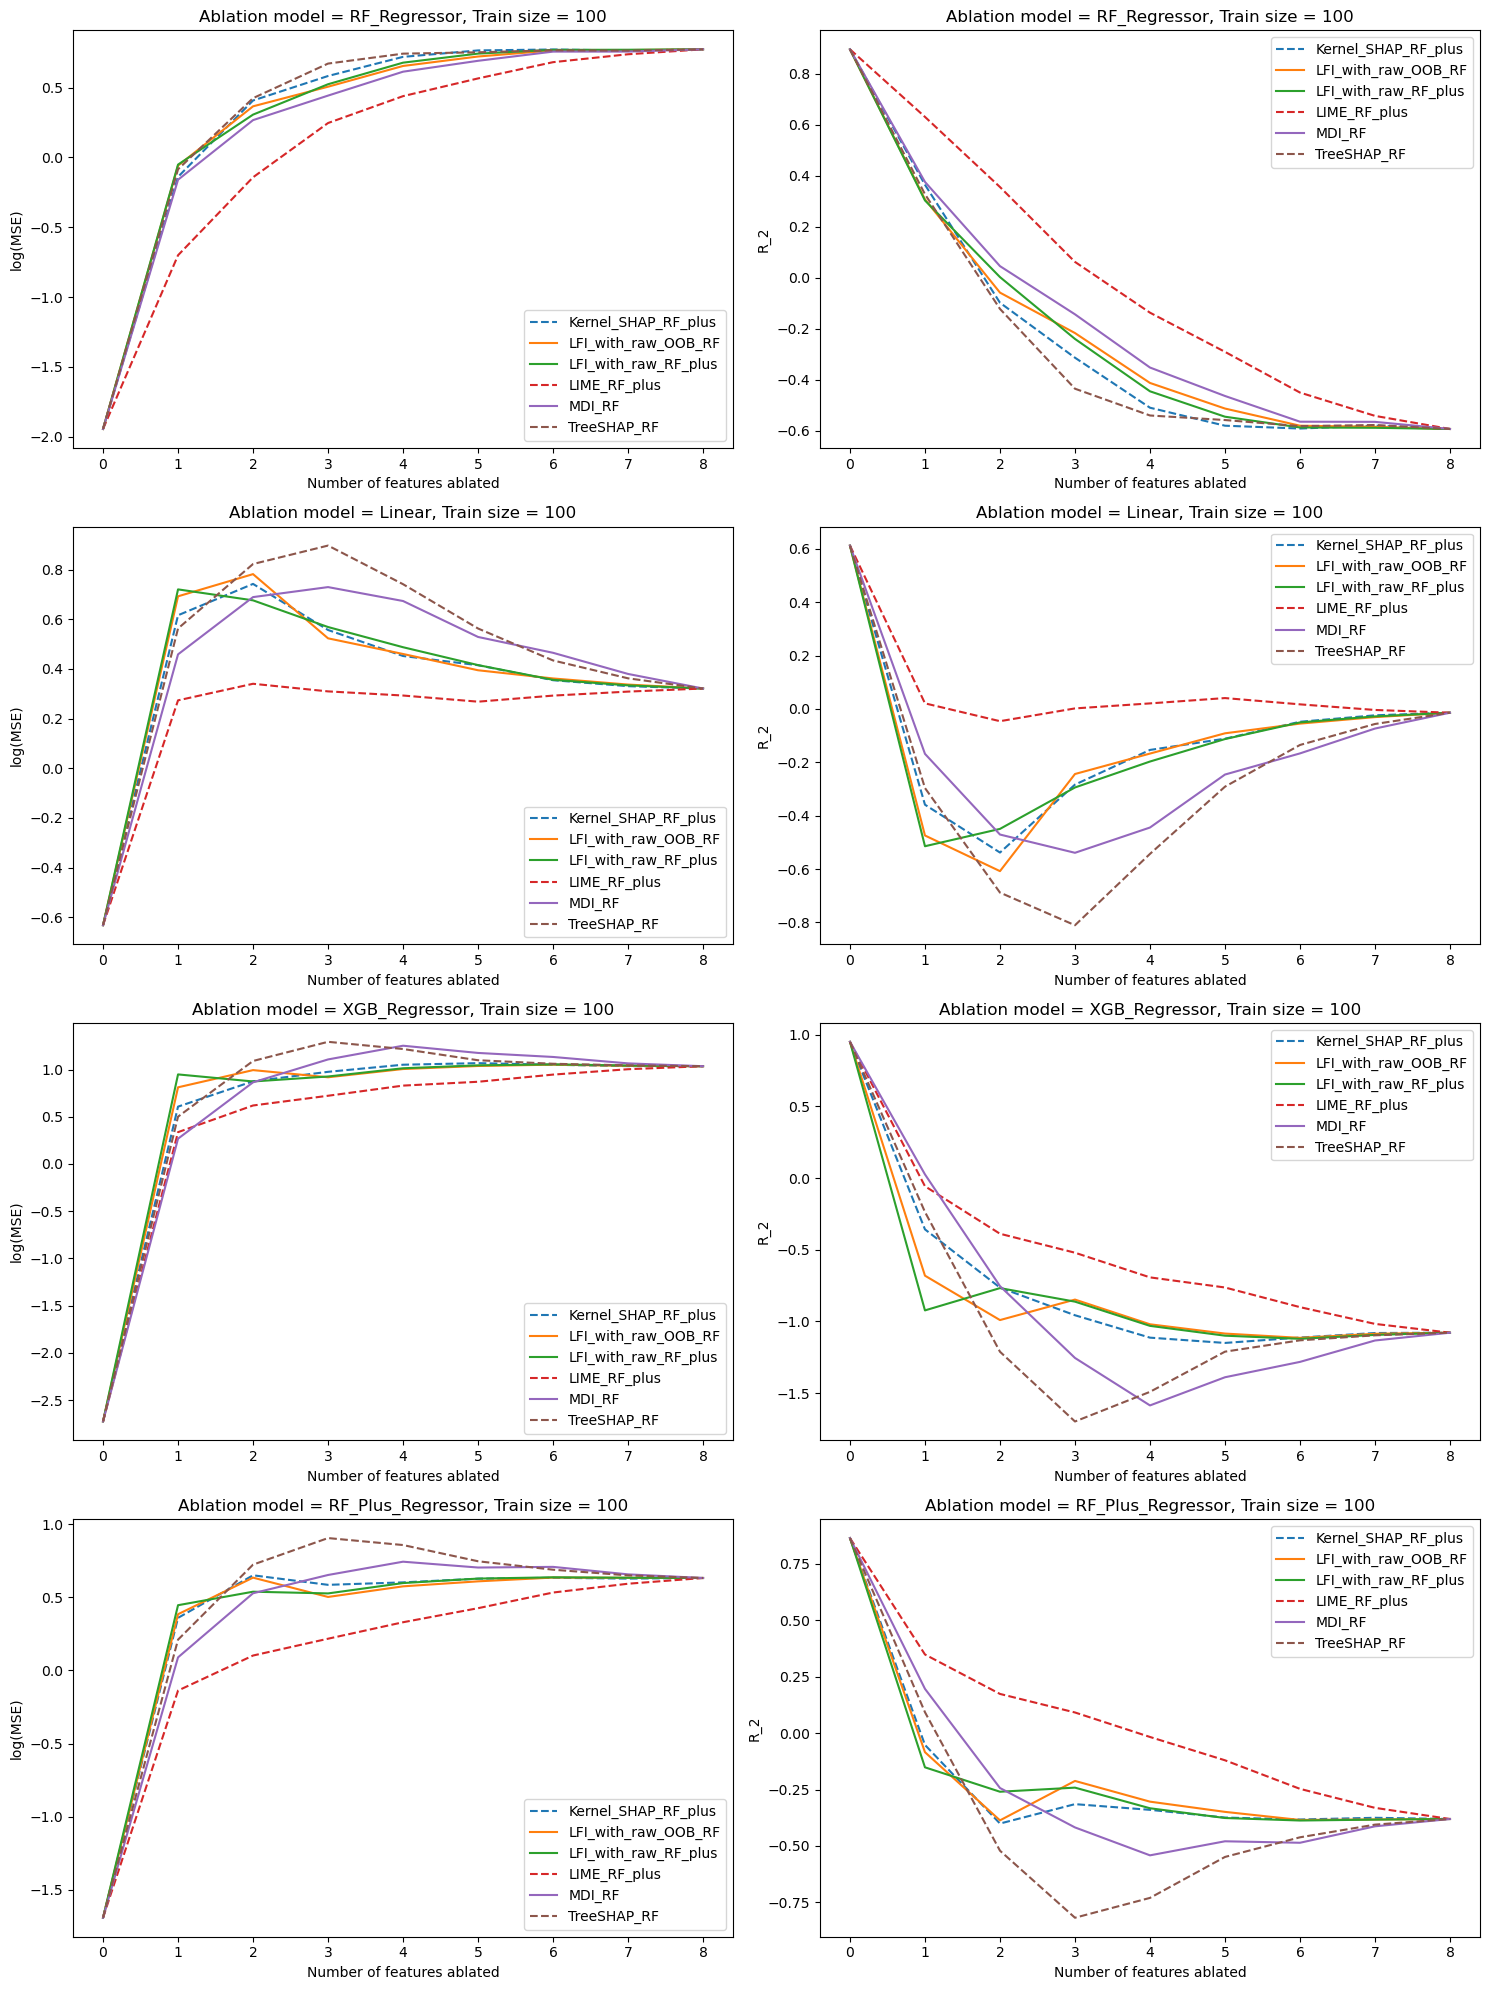

In [8]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        ax.legend()

plt.tight_layout()
plt.savefig("./diabetes_classification_train.png")
plt.show()

# Test data(subset)

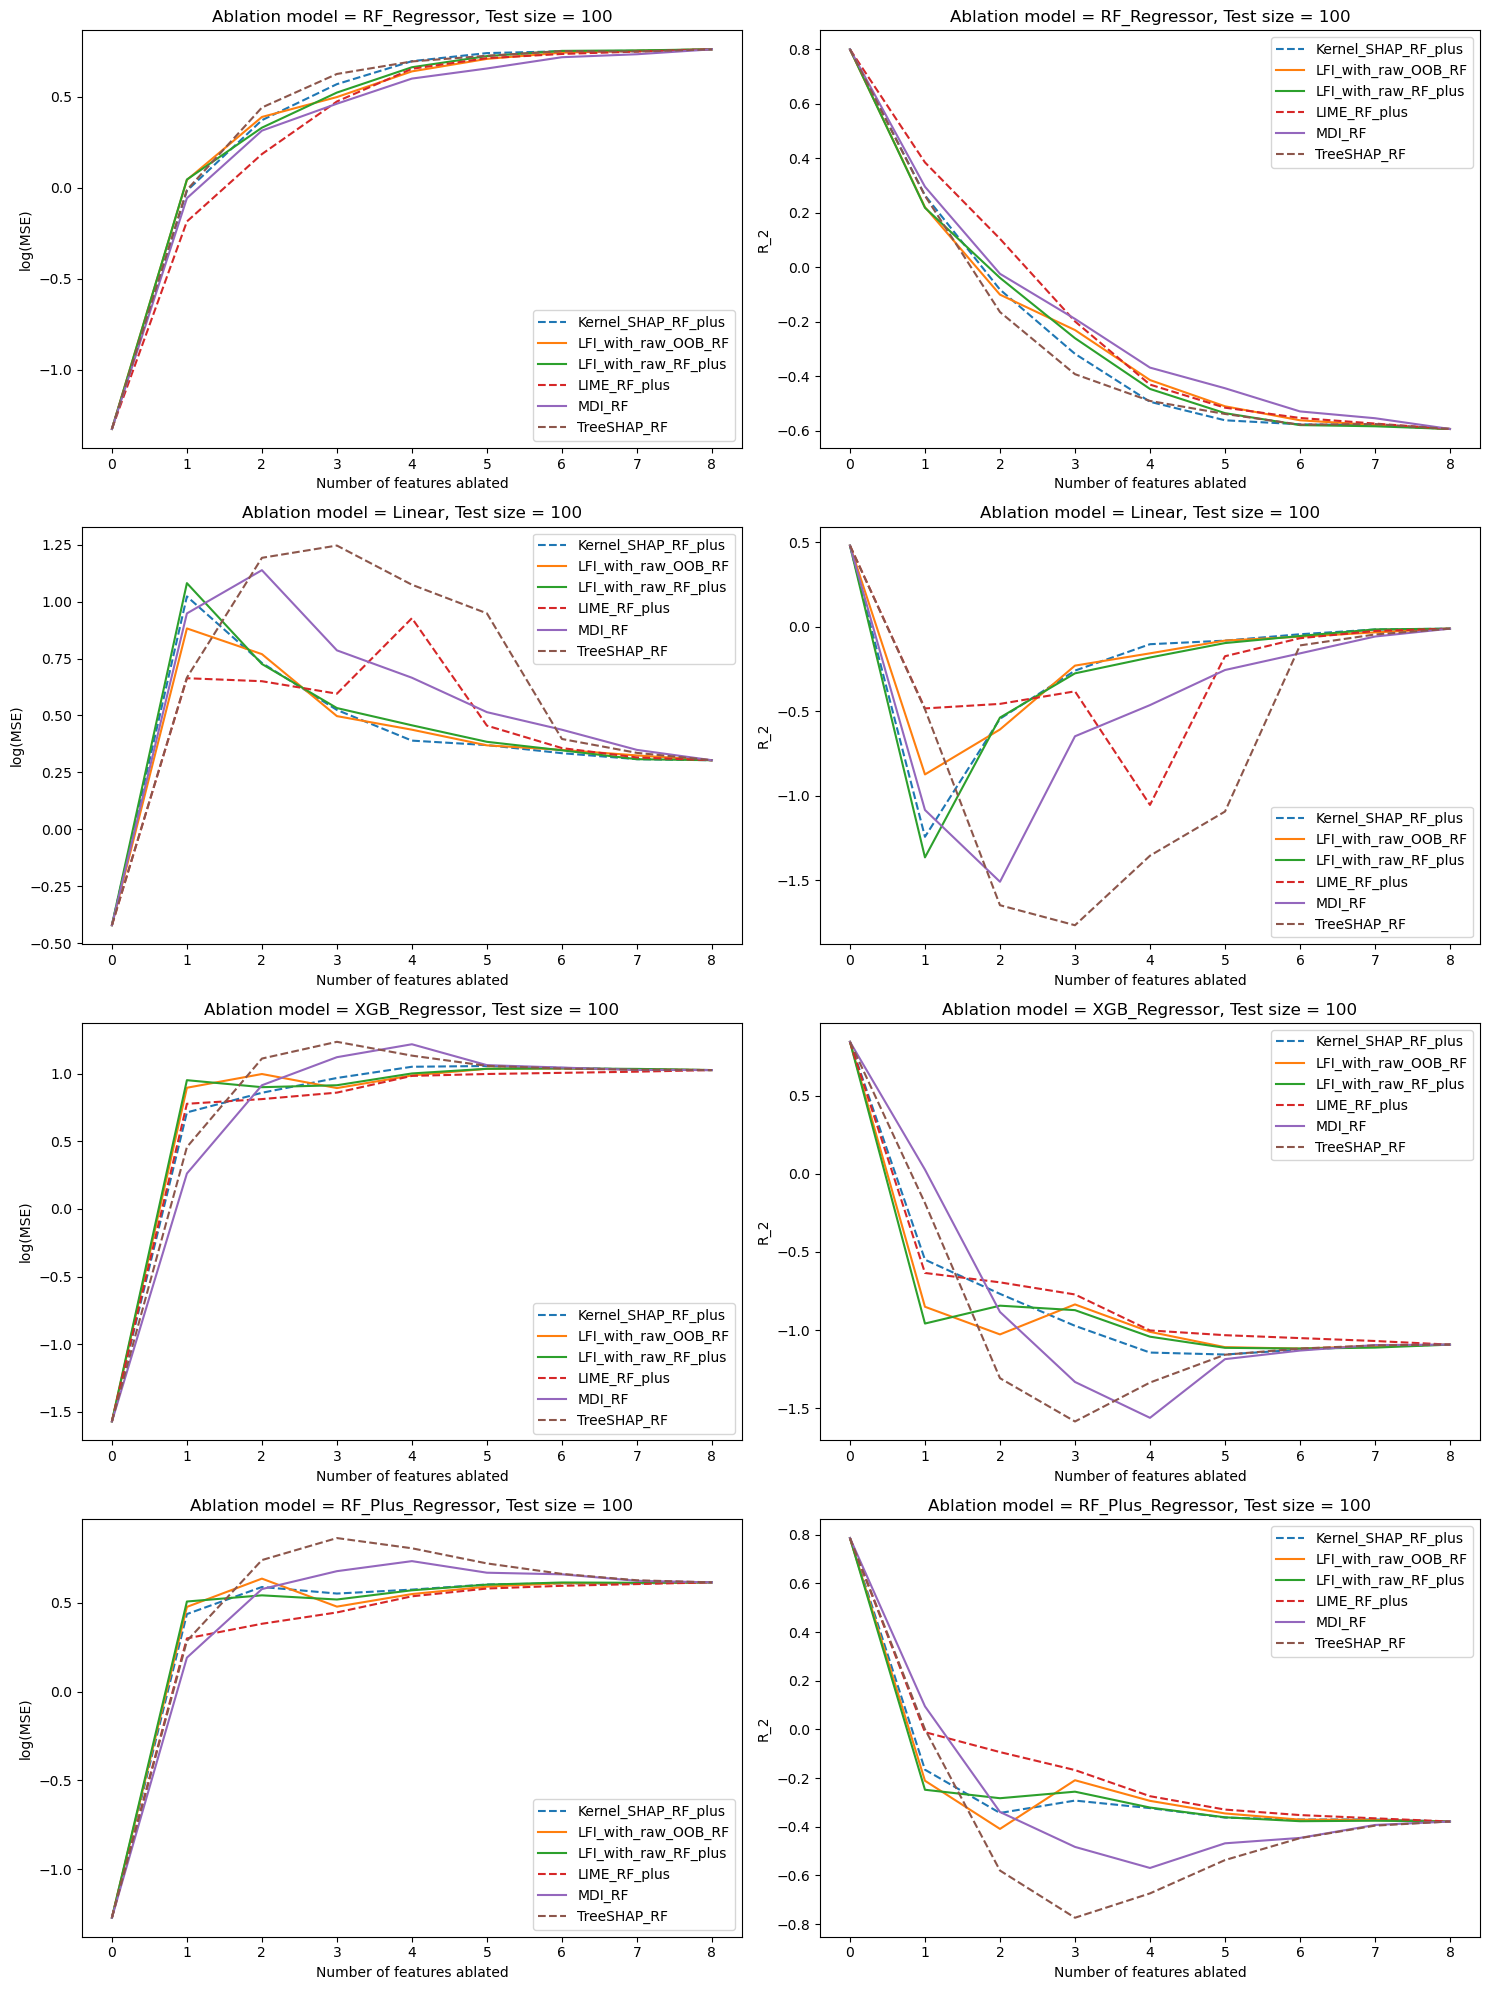

In [9]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        ax.legend()

plt.tight_layout()
plt.savefig("./diabetes_classification_test_subset_1.png")
plt.show()

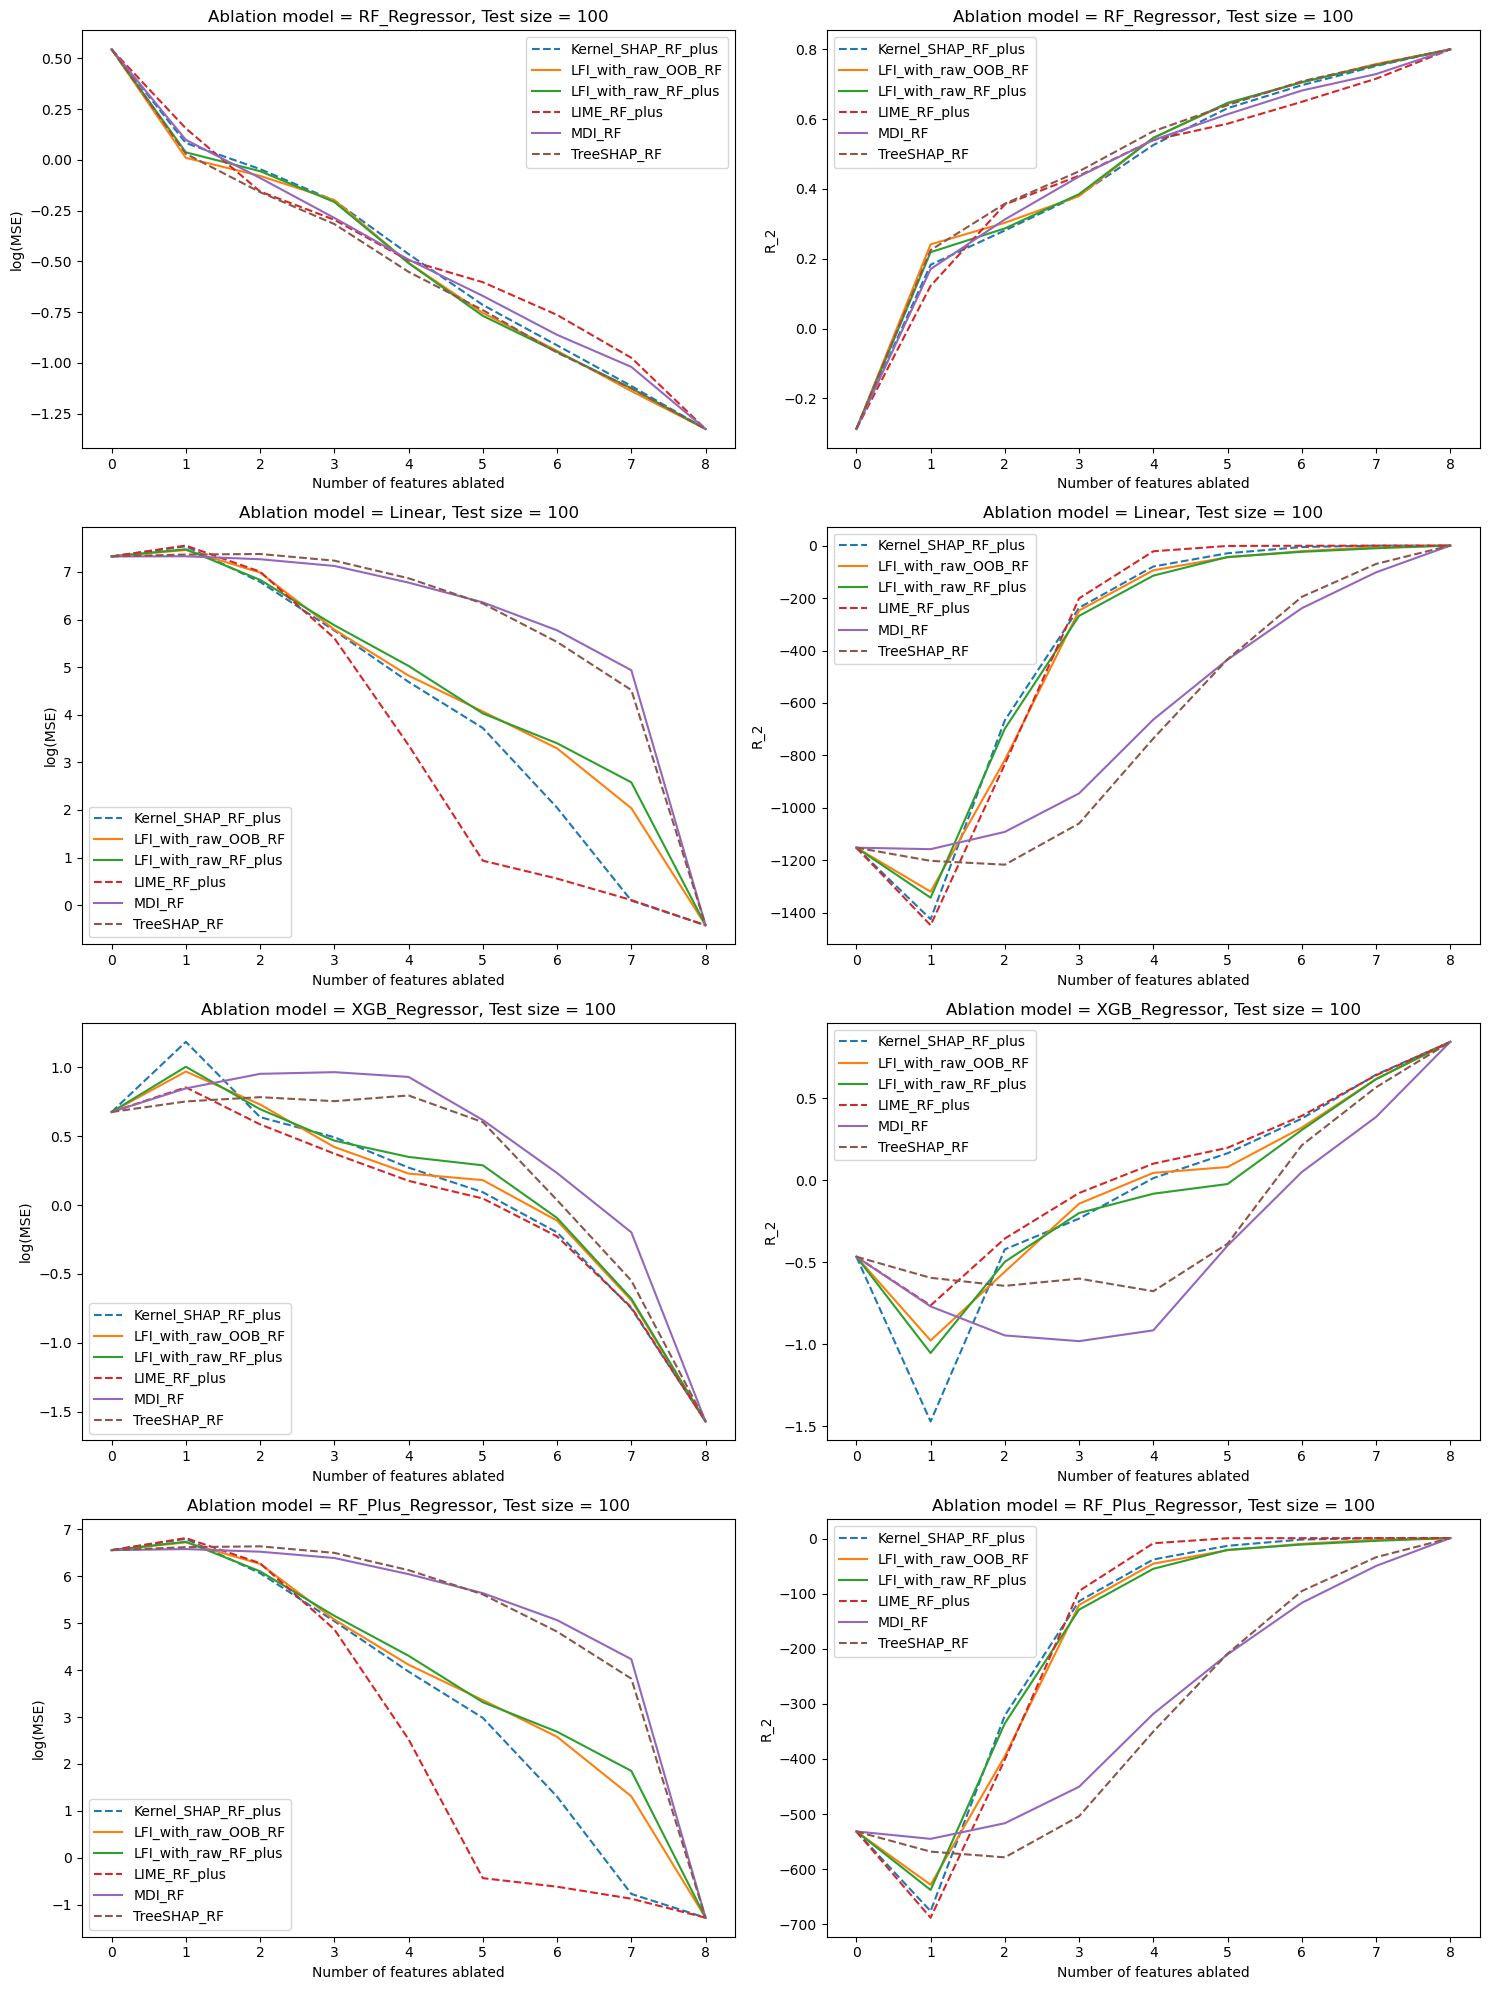

In [10]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_blank"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_blank"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_blank"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_blank"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m in ["TreeSHAP_RF","Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        ax.legend()
plt.tight_layout()
plt.savefig("./diabetes_classification_test_subset_2.png")
plt.show()

# Test data

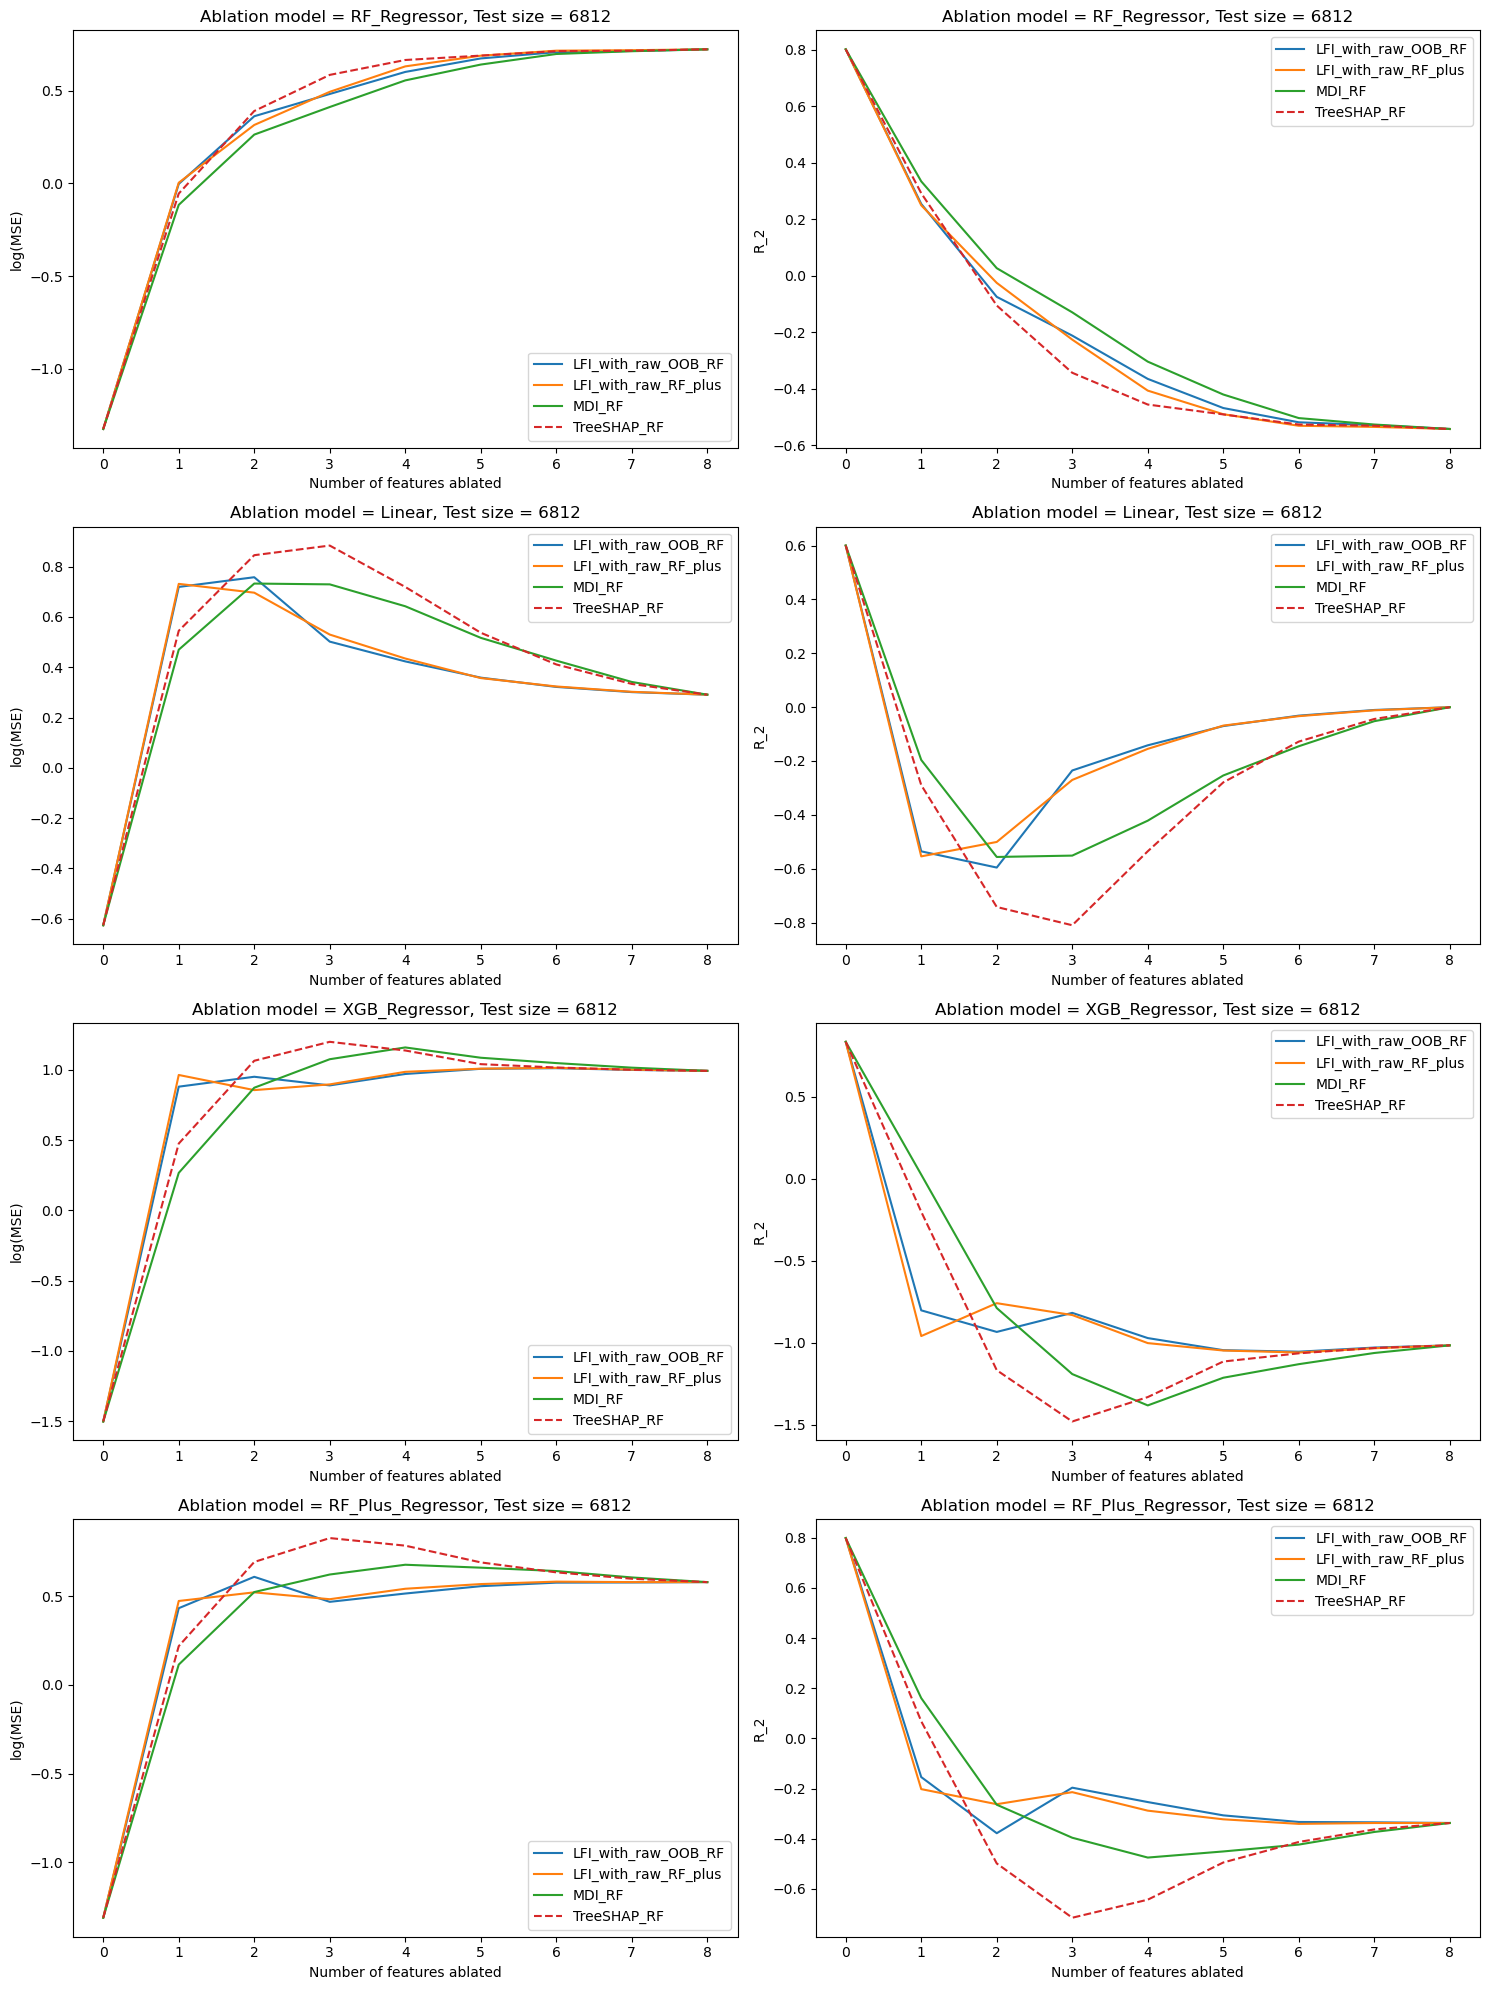

In [11]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m not in ["Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                if m in ["TreeSHAP_RF","Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                    ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
                else:
                    ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Test size = {n_testsize["test_size"].values[0]}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {n_testsize["test_size"].values[0]}')
        ax.legend()
plt.tight_layout()
plt.savefig("./diabetes_classification_test.png")
plt.show()